Python Libraries

In [ ]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.manifold import TSNE
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import Label, ColumnDataSource
import numpy as np

Statistic Analysis

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\张子奇\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


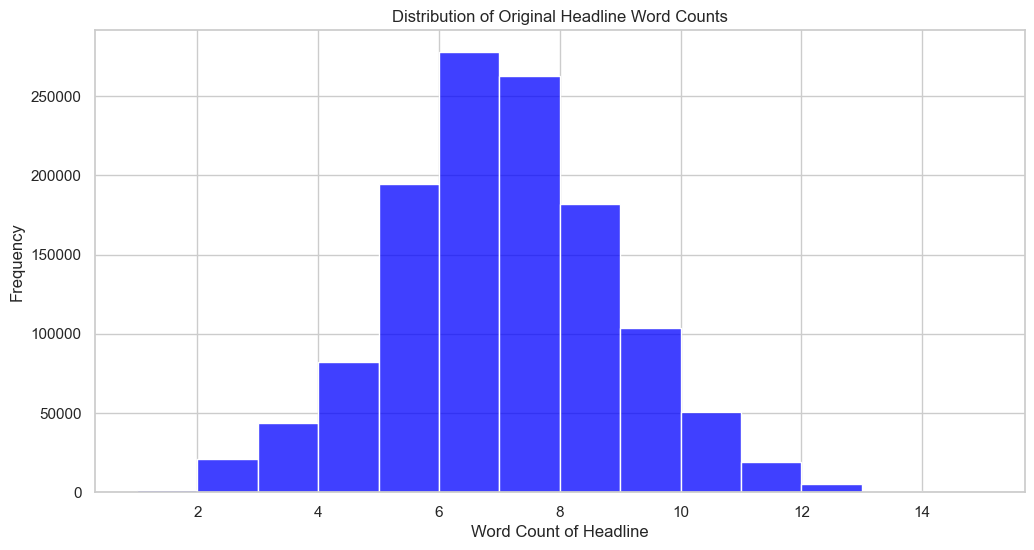

C:\Users\张子奇\AppData\Local\Temp\ipykernel_31564\4290385645.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_keywords.index, y=top_keywords.values, palette='magma')


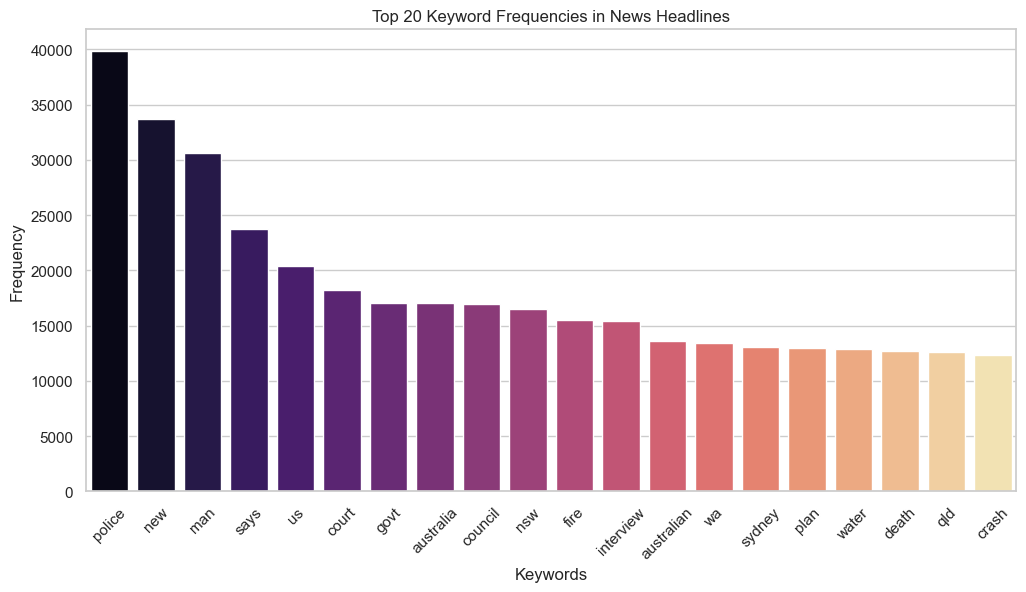

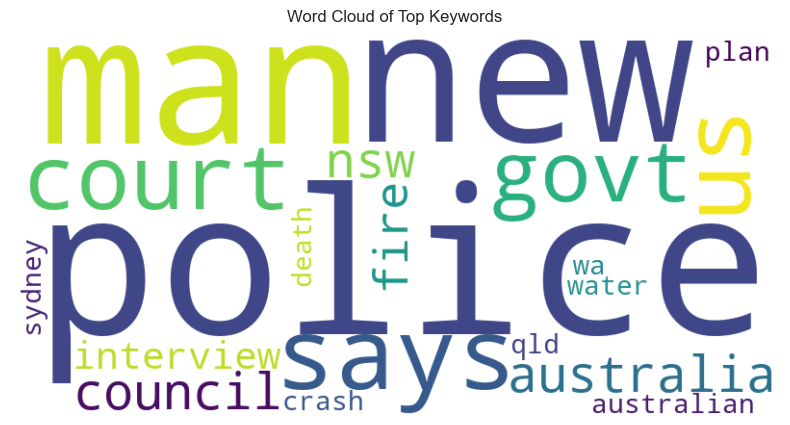

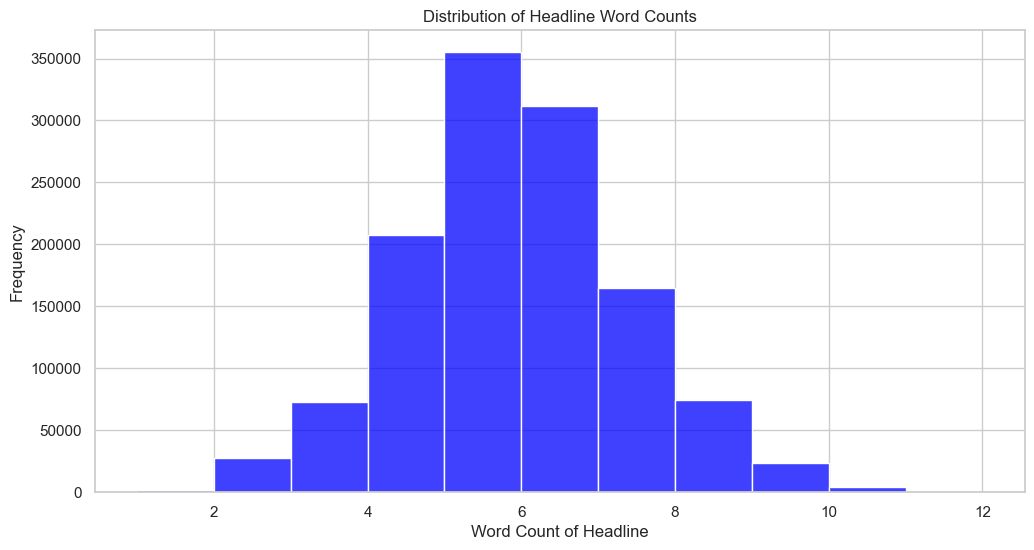

Average headline word count after stopword filtering: 5.43
News count per year:
year
2003    63997
2004    72674
2005    73124
2006    66901
2007    77174
2008    79991
2009    76444
2010    74931
2011    77778
2012    89008
2013    91928
2014    81531
2015    77290
2016    61574
2017    47511
2018    40102
2019    34060
2020    40240
2021    17926
Name: count, dtype: int64


C:\Users\张子奇\AppData\Local\Temp\ipykernel_31564\4290385645.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=news_count_per_year.index, y=news_count_per_year.values, palette='viridis')


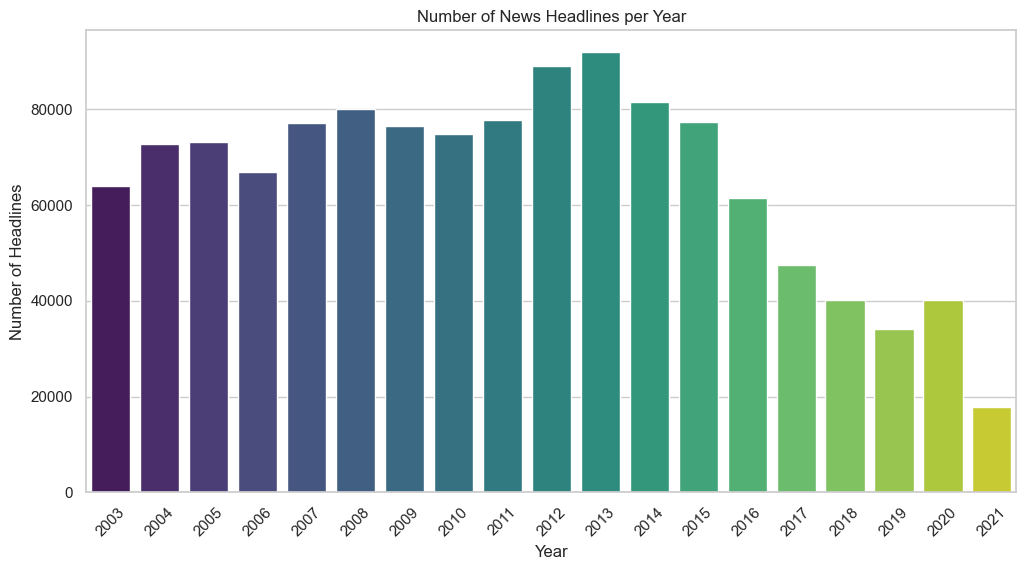

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

sns.set(style="whitegrid")

df = pd.read_csv('abcnews-date-text.csv')

stop_words = set(stopwords.words('english'))

df['original_headline_word_count'] = df['headline_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
sns.histplot(df['original_headline_word_count'], bins=range(1, df['original_headline_word_count'].max() + 1), kde=False, color='blue')
plt.title('Distribution of Original Headline Word Counts')
plt.xlabel('Word Count of Headline')
plt.ylabel('Frequency')
plt.show()

def clean_and_tokenize(text):
    text = text.lower()
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words

df['cleaned_headlines'] = df['headline_text'].apply(clean_and_tokenize)

keywords = df['cleaned_headlines'].explode().value_counts()

top_keywords = keywords.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_keywords.index, y=top_keywords.values, palette='magma')
plt.title('Top 20 Keyword Frequencies in News Headlines')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(top_keywords)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Keywords')
plt.show()

df['headline_word_count'] = df['cleaned_headlines'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(df['headline_word_count'], bins=range(1, df['headline_word_count'].max() + 1), kde=False, color='blue')
plt.title('Distribution of Headline Word Counts')
plt.xlabel('Word Count of Headline')
plt.ylabel('Frequency')
plt.show()

average_word_count = df['headline_word_count'].mean()

print(f"Average headline word count after stopword filtering: {average_word_count:.2f}")

df['publish_date'] = pd.to_datetime(df['publish_date'], format='%Y%m%d')
df['year'] = df['publish_date'].dt.year
news_count_per_year = df['year'].value_counts().sort_index()

print("News count per year:")
print(news_count_per_year)

plt.figure(figsize=(12, 6))
sns.barplot(x=news_count_per_year.index, y=news_count_per_year.values, palette='viridis')
plt.title('Number of News Headlines per Year')
plt.xlabel('Year')
plt.ylabel('Number of Headlines')
plt.xticks(rotation=45)
plt.show()

LDA

In [ ]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.manifold import TSNE
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import Label, ColumnDataSource
import numpy as np

nltk.download('stopwords')
nltk.download('wordnet')

df = pd.read_csv('abcnews-date-text.csv', header=None, usecols=[1]).sample(n=10000, random_state=1)

texts = df[1].values
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

processed_texts = []
for text in texts:
    text = text.lower()
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    processed_text = ' '.join(words)
    processed_texts.append(processed_text)

vectorizer = CountVectorizer(stop_words='english', max_features=40000)
document_term_matrix = vectorizer.fit_transform(processed_texts)

lda_model = LDA(n_components=10, learning_method='online', random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(document_term_matrix)

tsne_model = TSNE(n_components=2, perplexity=50, learning_rate=100, n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_model.fit_transform(lda_topic_matrix)

def print_topics(model, vectorizer, top_n=10):
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #{}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[-top_n:]]))

print("LDA Topics:")
print_topics(lda_model, vectorizer, top_n=5)  

output_notebook()
n_topics = 10
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

lda_source = ColumnDataSource(data=dict(
    x=tsne_lda_vectors[:, 0],
    y=tsne_lda_vectors[:, 1],
    topic=[str(i) for i in np.argmax(lda_topic_matrix, axis=1)],
    color=[colormap[i] for i in np.argmax(lda_topic_matrix, axis=1)]
))

plot_lda = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), width=700, height=700)
plot_lda.scatter(x='x', y='y', color='color', legend_field='topic', source=lda_source, size=5)

top_5_words_lda = []
for i in range(n_topics):
    top_features_ind = lda_model.components_[i].argsort()[-5:]
    top_5_words_lda.append(', '.join([vectorizer.get_feature_names_out()[j] for j in top_features_ind]))

for t in range(n_topics):
    label = Label(x=np.mean(tsne_lda_vectors[np.argmax(lda_topic_matrix, axis=1) == t, 0]),
                 y=np.mean(tsne_lda_vectors[np.argmax(lda_topic_matrix, axis=1) == t, 1]),
                 text=top_5_words_lda[t], text_color=colormap[t])
    plot_lda.add_layout(label)

show(plot_lda)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\张子奇\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\张子奇\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\张子奇\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.008s...
[t-SNE] Computed neighbors for 10000 samples in 1.435s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.329300
[t-SNE] KL divergence after 2000 iterations: 1.607822
LDA Topics:
Topic #0:
ma

Loading BokehJS ...

LSA

In [ ]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD as LSA
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.manifold import TSNE
import numpy as np
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, Label
from bokeh.transform import factor_cmap

nltk.download('stopwords')
nltk.download('wordnet')

df = pd.read_csv('abcnews-date-text.csv', header=None, usecols=[1]).sample(n=10000, random_state=1)

texts = df[1].values
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
processed_texts = [" ".join([lemmatizer.lemmatize(word) for word in text.lower().split() if word not in stop_words]) for text in texts]

vectorizer = CountVectorizer(max_features=40000, stop_words='english')
document_term_matrix = vectorizer.fit_transform(processed_texts)

lsa_model = LSA(n_components=10)
lsa_matrix = lsa_model.fit_transform(document_term_matrix)

tsne_model = TSNE(n_components=2, perplexity=50, learning_rate=100, n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_model.fit_transform(lsa_matrix)

def get_top_n_words(n_top_words, model, feature_names):
    result = []
    for topic_idx, topic in enumerate(model.components_):
        result.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    return result

n_topics = 10
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5"])

feature_names = vectorizer.get_feature_names_out()

top_5_words_lsa = get_top_n_words(5, lsa_model, feature_names)

print("LSA Topics:")
for idx, topic in enumerate(top_5_words_lsa):
    print(f"Topic {idx + 1}: {', '.join(topic)}")

lsa_topics = np.argmax(lsa_matrix, axis=1)

output_notebook()

lsa_source = ColumnDataSource(data=dict(
    x=tsne_lsa_vectors[:, 0],
    y=tsne_lsa_vectors[:, 1],
    lsa_topics=[str(topic) for topic in lsa_topics]
))

plot_lsa = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), width=700, height=700)
plot_lsa.scatter(x='x', y='y', color=factor_cmap('lsa_topics', palette=colormap, factors=[str(i) for i in range(n_topics)]), legend_field='lsa_topics', source=lsa_source,size=5)

for t in range(n_topics):
    label = Label(x=np.mean(tsne_lsa_vectors[lsa_topics == t, 0]), y=np.mean(tsne_lsa_vectors[lsa_topics == t, 1]), 
                 text=', '.join(top_5_words_lsa[t]), text_color=colormap[t])
    plot_lsa.add_layout(label)

show(plot_lsa)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\张子奇\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\张子奇\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\张子奇\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.017s...
[t-SNE] Computed neighbors for 10000 samples in 1.250s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.003903
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.055420
[t-SNE] KL divergence after 2000 iterations: 1.251930
LSA Topics:
Topic 1: pol

Loading BokehJS ...